# Usage

First, importing:

In [1]:
from solarmach import SolarMACH, print_body_list

---
## 1. Minimal example <a class="anchor" id="Minimal_example"></a>

Necessary options are a list of wanted spacecraft/bodies, the corresponding solar wind speeds (in km/s), and the date of interest:

In [2]:
body_list = ['Earth', 'Solar Orbiter', 'PSP']
vsw_list = [400, 400, 400]    # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Initialize the SolarMACH object for these options:

In [3]:
sm1 = SolarMACH(date, body_list, vsw_list)

And produce the final plot:

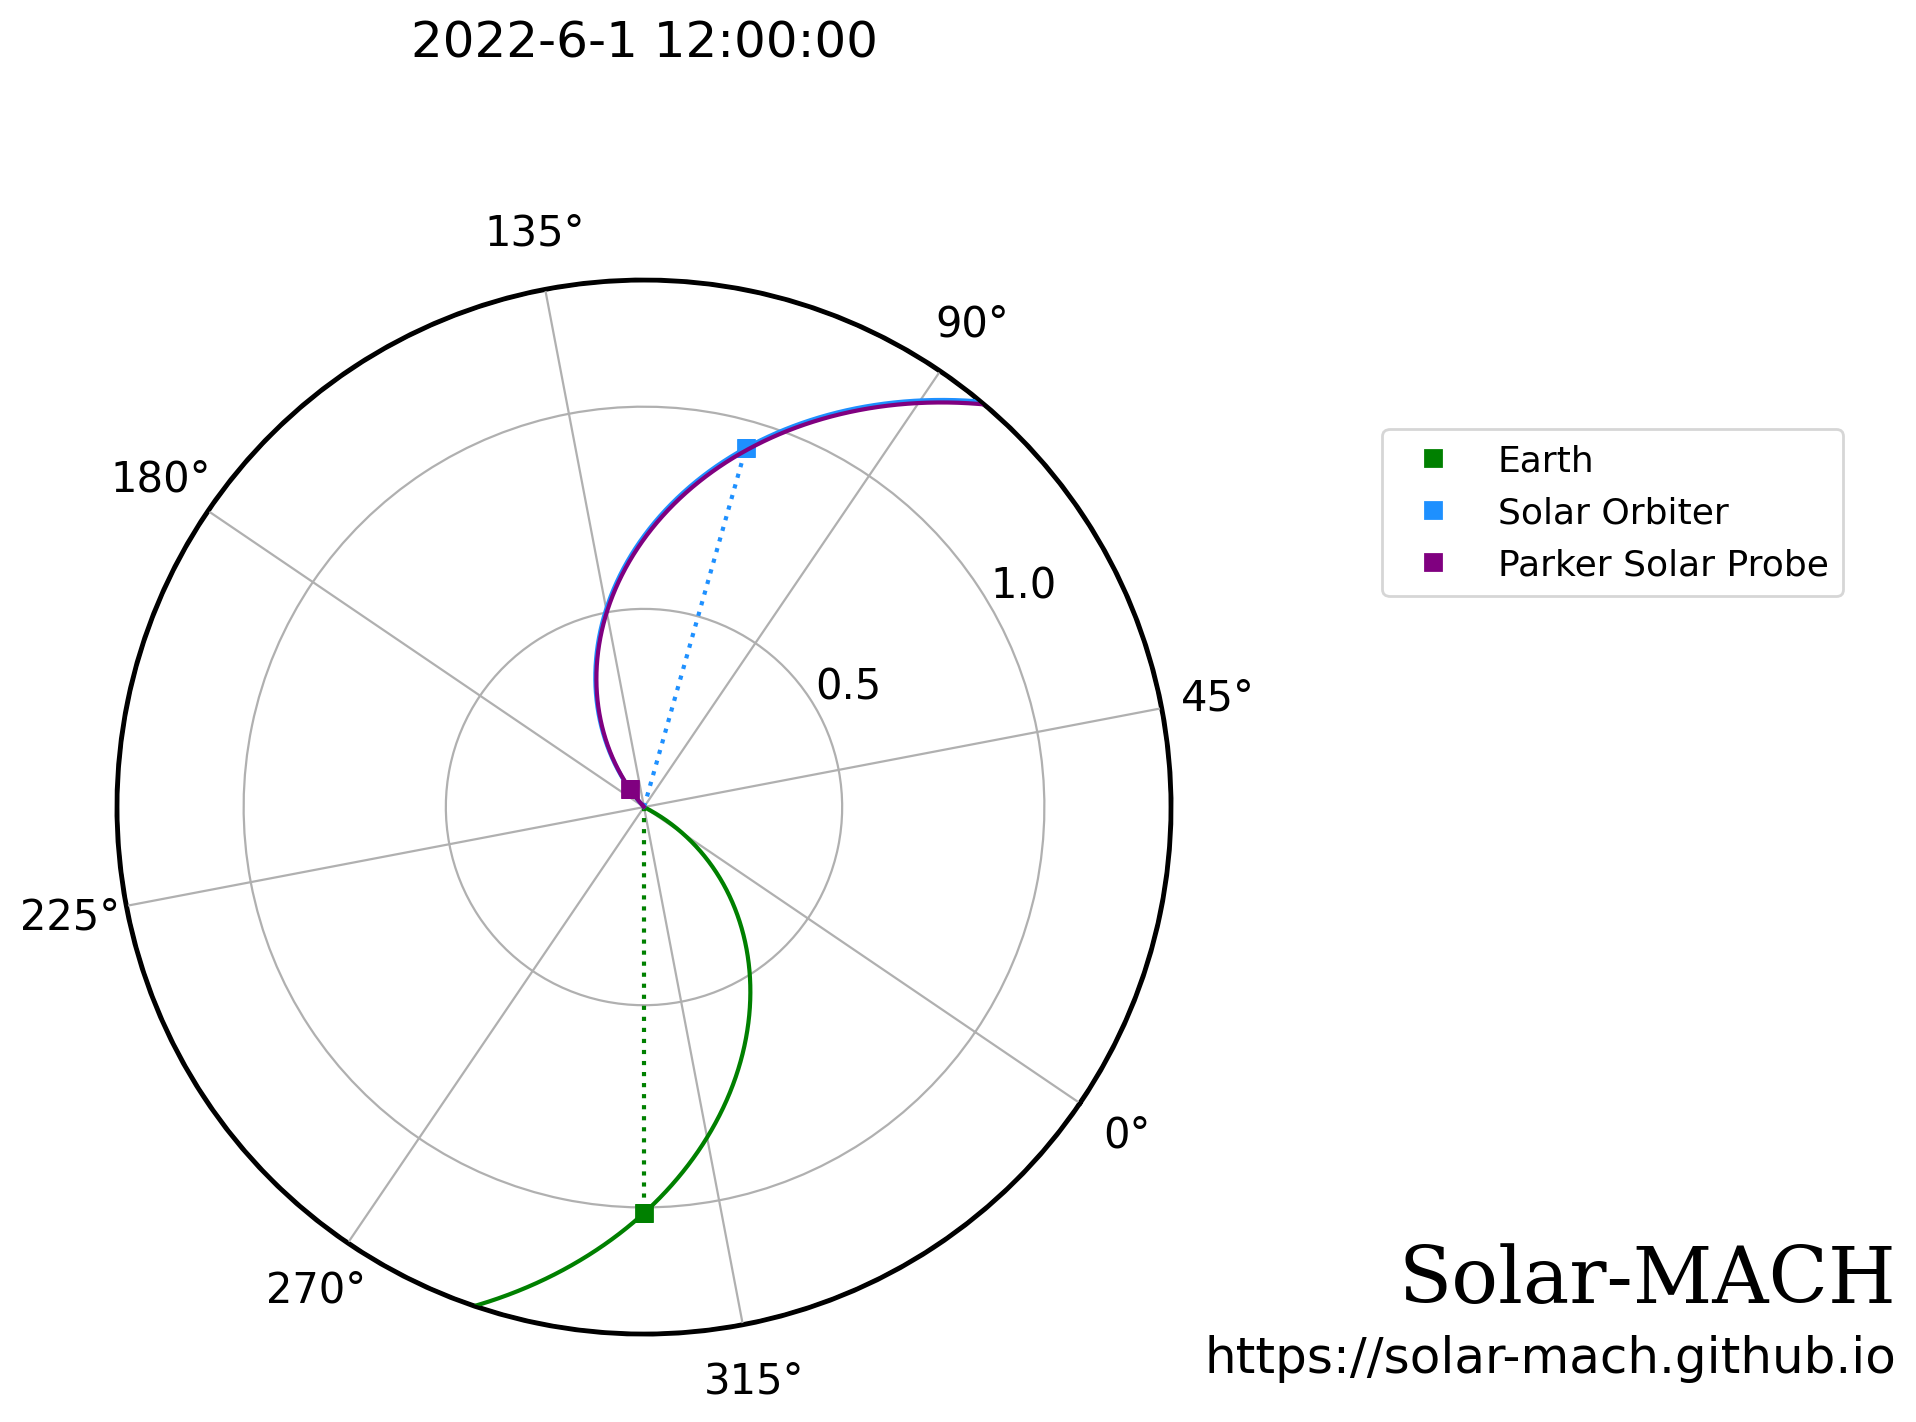

In [4]:
sm1.plot(plot_sun_body_line=True)

This plot shows a view from the top on the ecliptic plane with the Sun in the center and the Earth (indicated by green symbol) at "6 o'clock". The solid lines give estimations of single field lines of an ideal Parker heliospheric magnetic field connecting the corresponding observers to the Sun, while the dashed lines just indicate the line of sight from each of them to the Sun.

---

## 2. Example with all the details <a class="anchor" id="Example_all_details"></a>

First, get a list of available bodies/spacecraft:

In [5]:
print(print_body_list().index)

Index(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'L1', 'ACE', 'STEREO B',
       'STEREO A', 'SOHO', 'Solar Orbiter', 'PSP', 'BepiColombo', 'MAVEN',
       'Mars Express', 'MESSENGER', 'JUICE', 'Juno', 'Cassini', 'Rosetta',
       'Pioneer10', 'Pioneer11', 'Ulysses', 'Voyager1', 'Voyager2'],
      dtype='object', name='Key')


Provide the necessary options, this time for more spacecraft:

In [6]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]  # position-sensitive solar wind speed per body in body_list
date = '2021-6-1 12:00:00'

The default coordinate system is [Carrington coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html), alternatively one could select the Earth-centered [Stonyhurst coordinate](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) system:

In [7]:
coord_sys = 'Carrington'     # 'Carrington' (default) or 'Stoneyhurst'

Now we also want to indicate the position and direction of a flare, and the (assumed) solar wind speed at its location:

In [8]:
reference_long = 0            # Carrington longitude of reference (None to omit)
reference_lat = 0             # Carrington latitude of reference (None to omit)
reference_vsw = 400           # define solar wind speed at reference

In addition, we explicitly provide all availabe plotting options:

In [9]:
plot_spirals = True           # plot Parker spirals for each body
plot_sun_body_line = False    # plot straight line between Sun and body
long_offset = 0               # longitudinal offset for polar plot; defines where Earth's longitude is (by default 270, i.e., at "6 o'clock")
transparent = False           # make output figure background transparent
numbered_markers = True       # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

Finally, initializing and plotting with these options. If `outfile` is provided, the plot will be saved next to the Notebook with the provided `filename`.

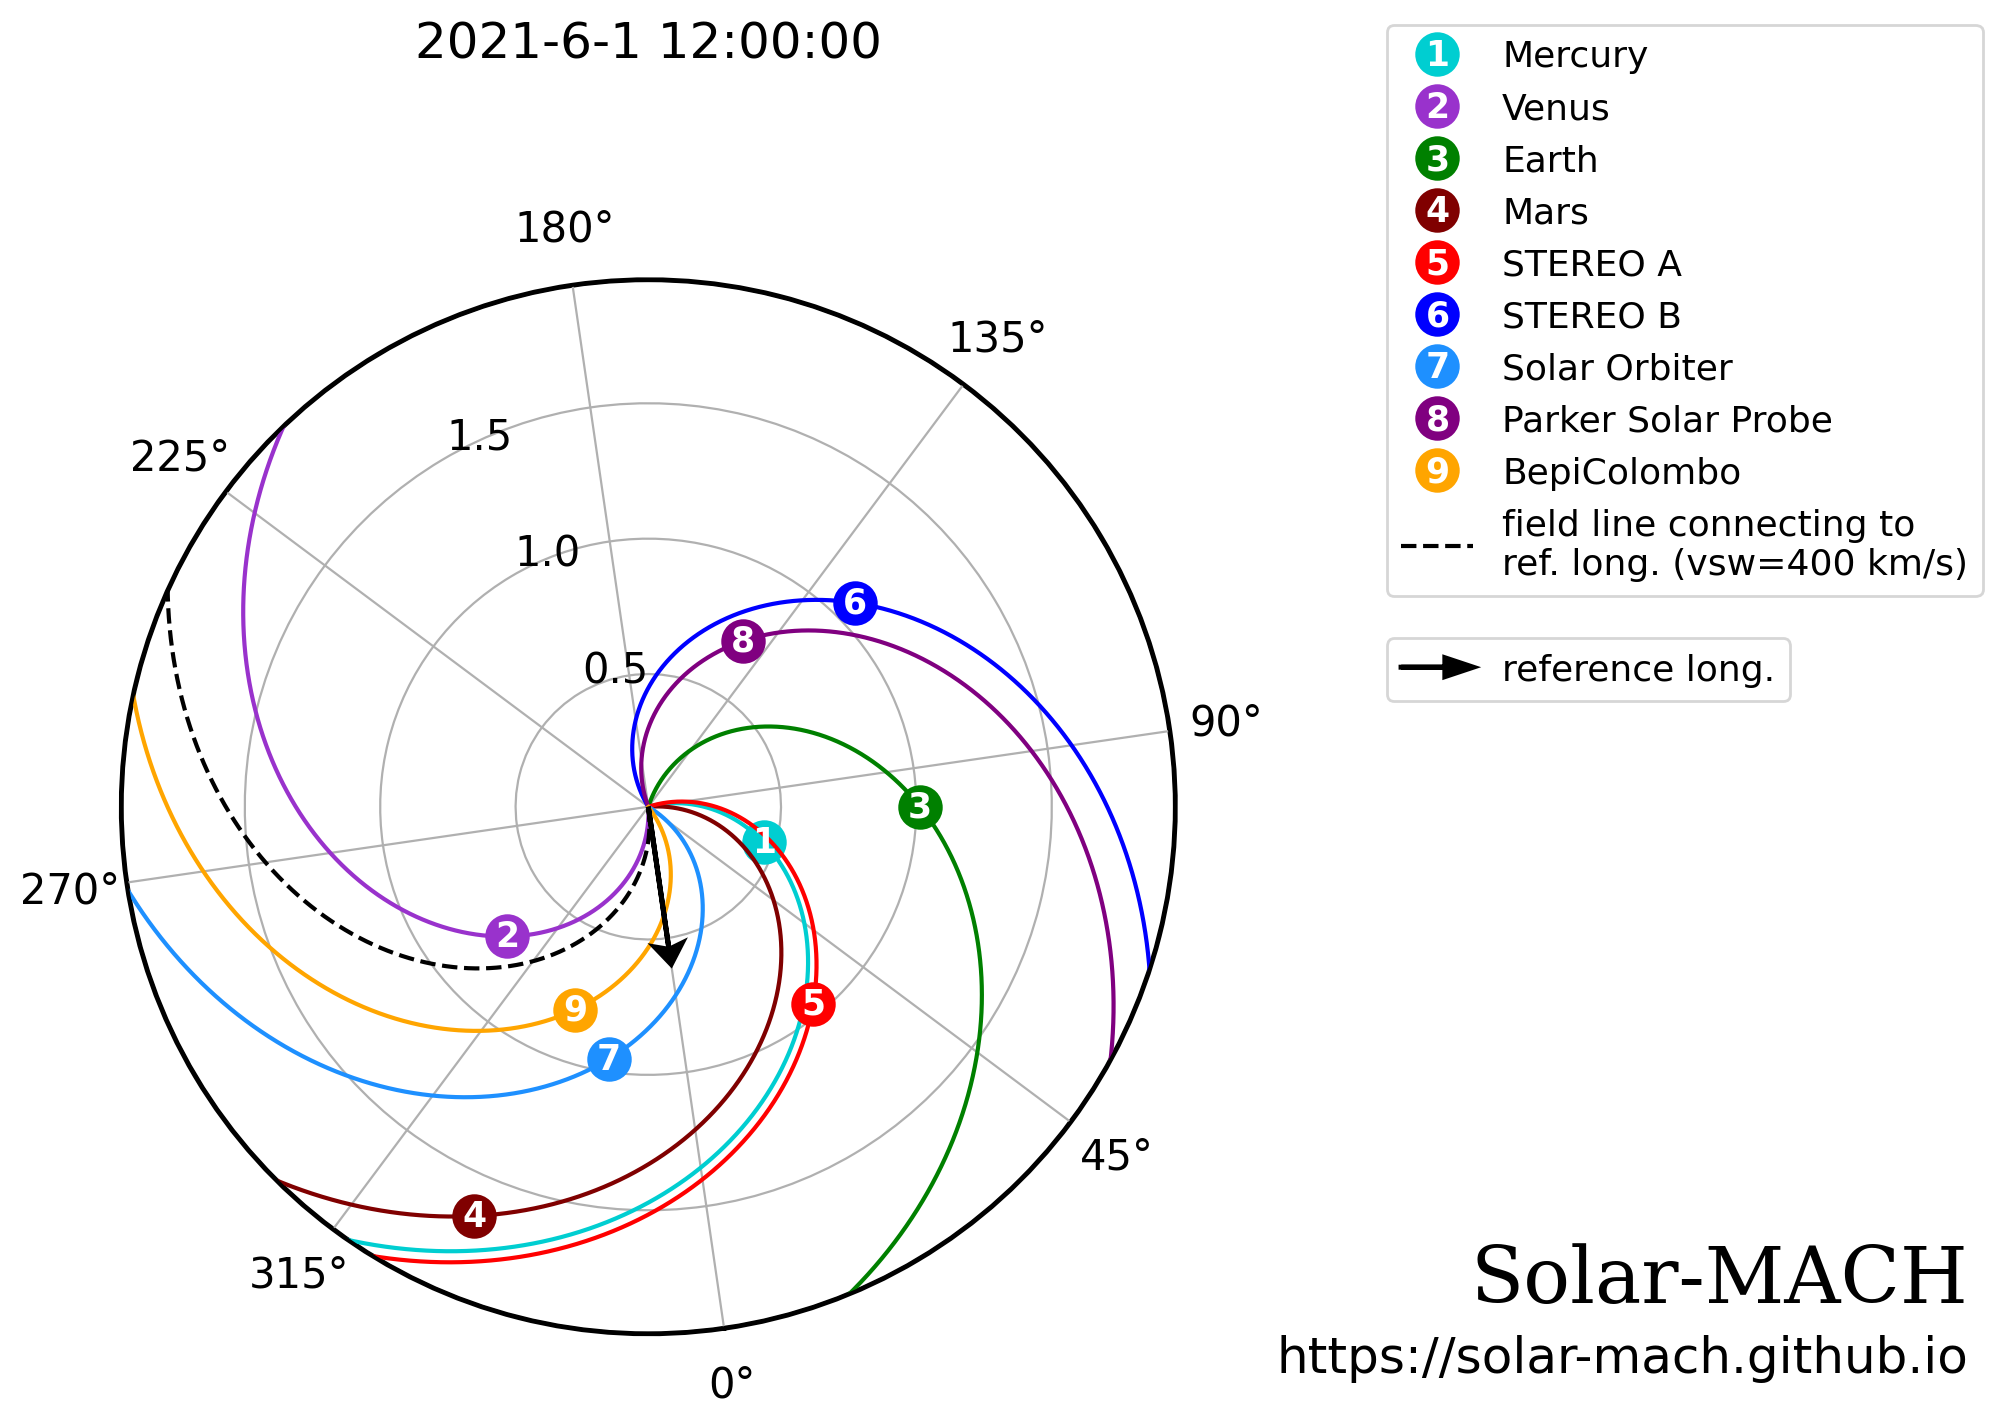

In [10]:
sm2 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys)

sm2.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         long_offset=long_offset,
         reference_vsw=reference_vsw,
         transparent=transparent,
         numbered_markers=numbered_markers,
         outfile=filename
         )

All the data can also be obtained as a Pandas DataFrame for further use:

In [11]:
df = sm2.coord_table
display(df)

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,Mercury,64.572366,-3.374752,0.456577,-17.161028,-2.767176,350,96.911462,64.572366,96.911462,-3.374752
1,Venus,304.308841,-2.405230,0.718663,-137.424553,-1.797654,350,355.463238,-55.691159,-4.536762,-2.405230
2,Earth,81.733394,-0.607576,1.014084,0.000000,0.000000,350,154.136171,81.733394,154.136171,-0.607576
3,Mars,328.690673,-4.569037,1.657439,-113.042721,-3.961461,350,86.722920,-31.309327,86.722920,-4.569037
4,STEREO A,31.671472,-5.969301,0.963303,-50.061921,-5.361726,350,99.918030,31.671472,99.918030,-5.969301
5,STEREO B,126.320990,4.463536,1.085839,44.587597,5.071112,350,203.548635,126.320990,-156.451365,4.463536
6,Solar Orbiter,342.893742,-1.038420,0.952075,-98.839652,-0.430845,350,50.838628,-17.106258,50.838628,-1.038420
7,PSP,142.038810,3.210198,0.715577,60.305417,3.817774,350,192.923248,142.038810,-167.076752,3.210198
8,BepiColombo,331.970837,-3.538780,0.807266,-109.762557,-2.931204,350,29.390736,-28.029163,29.390736,-3.538780


In [12]:
df['Heliocentric distance (AU)'].values

array([0.45657717, 0.71866253, 1.0140839 , 1.65743876, 0.9633026 ,
       1.08583866, 0.95207518, 0.7155775 , 0.80726552])

---

## 3. Example using Stonyhurst coordinates for reference <a class="anchor" id="Example_stonyhurst"></a>

Let's take a look at the situation at the first ground-level enhancement (GLE) of solar cycle 25 on 28 October 2021 

First, we just provide some options as before:

In [13]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]        # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'
coord_sys = 'Stoneyhurst'

# optional parameters
plot_spirals = True           # plot Parker spirals for each body
plot_sun_body_line = True     # plot straight line between Sun and body
transparent = False           # make output figure background transparent
numbered_markers = True       # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

But now we want to provide the coordinates of the flare in [Stonyhurst coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) (instead of [Carrington](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html)).

In [14]:
reference_long = 2            # Stonyhurst longitude of reference (None to omit)
reference_lat = 26            # Stonyhurst latitude of reference (None to omit)
reference_vsw = 300           # define solar wind speed at reference

Finally, initializing and plotting with these options:

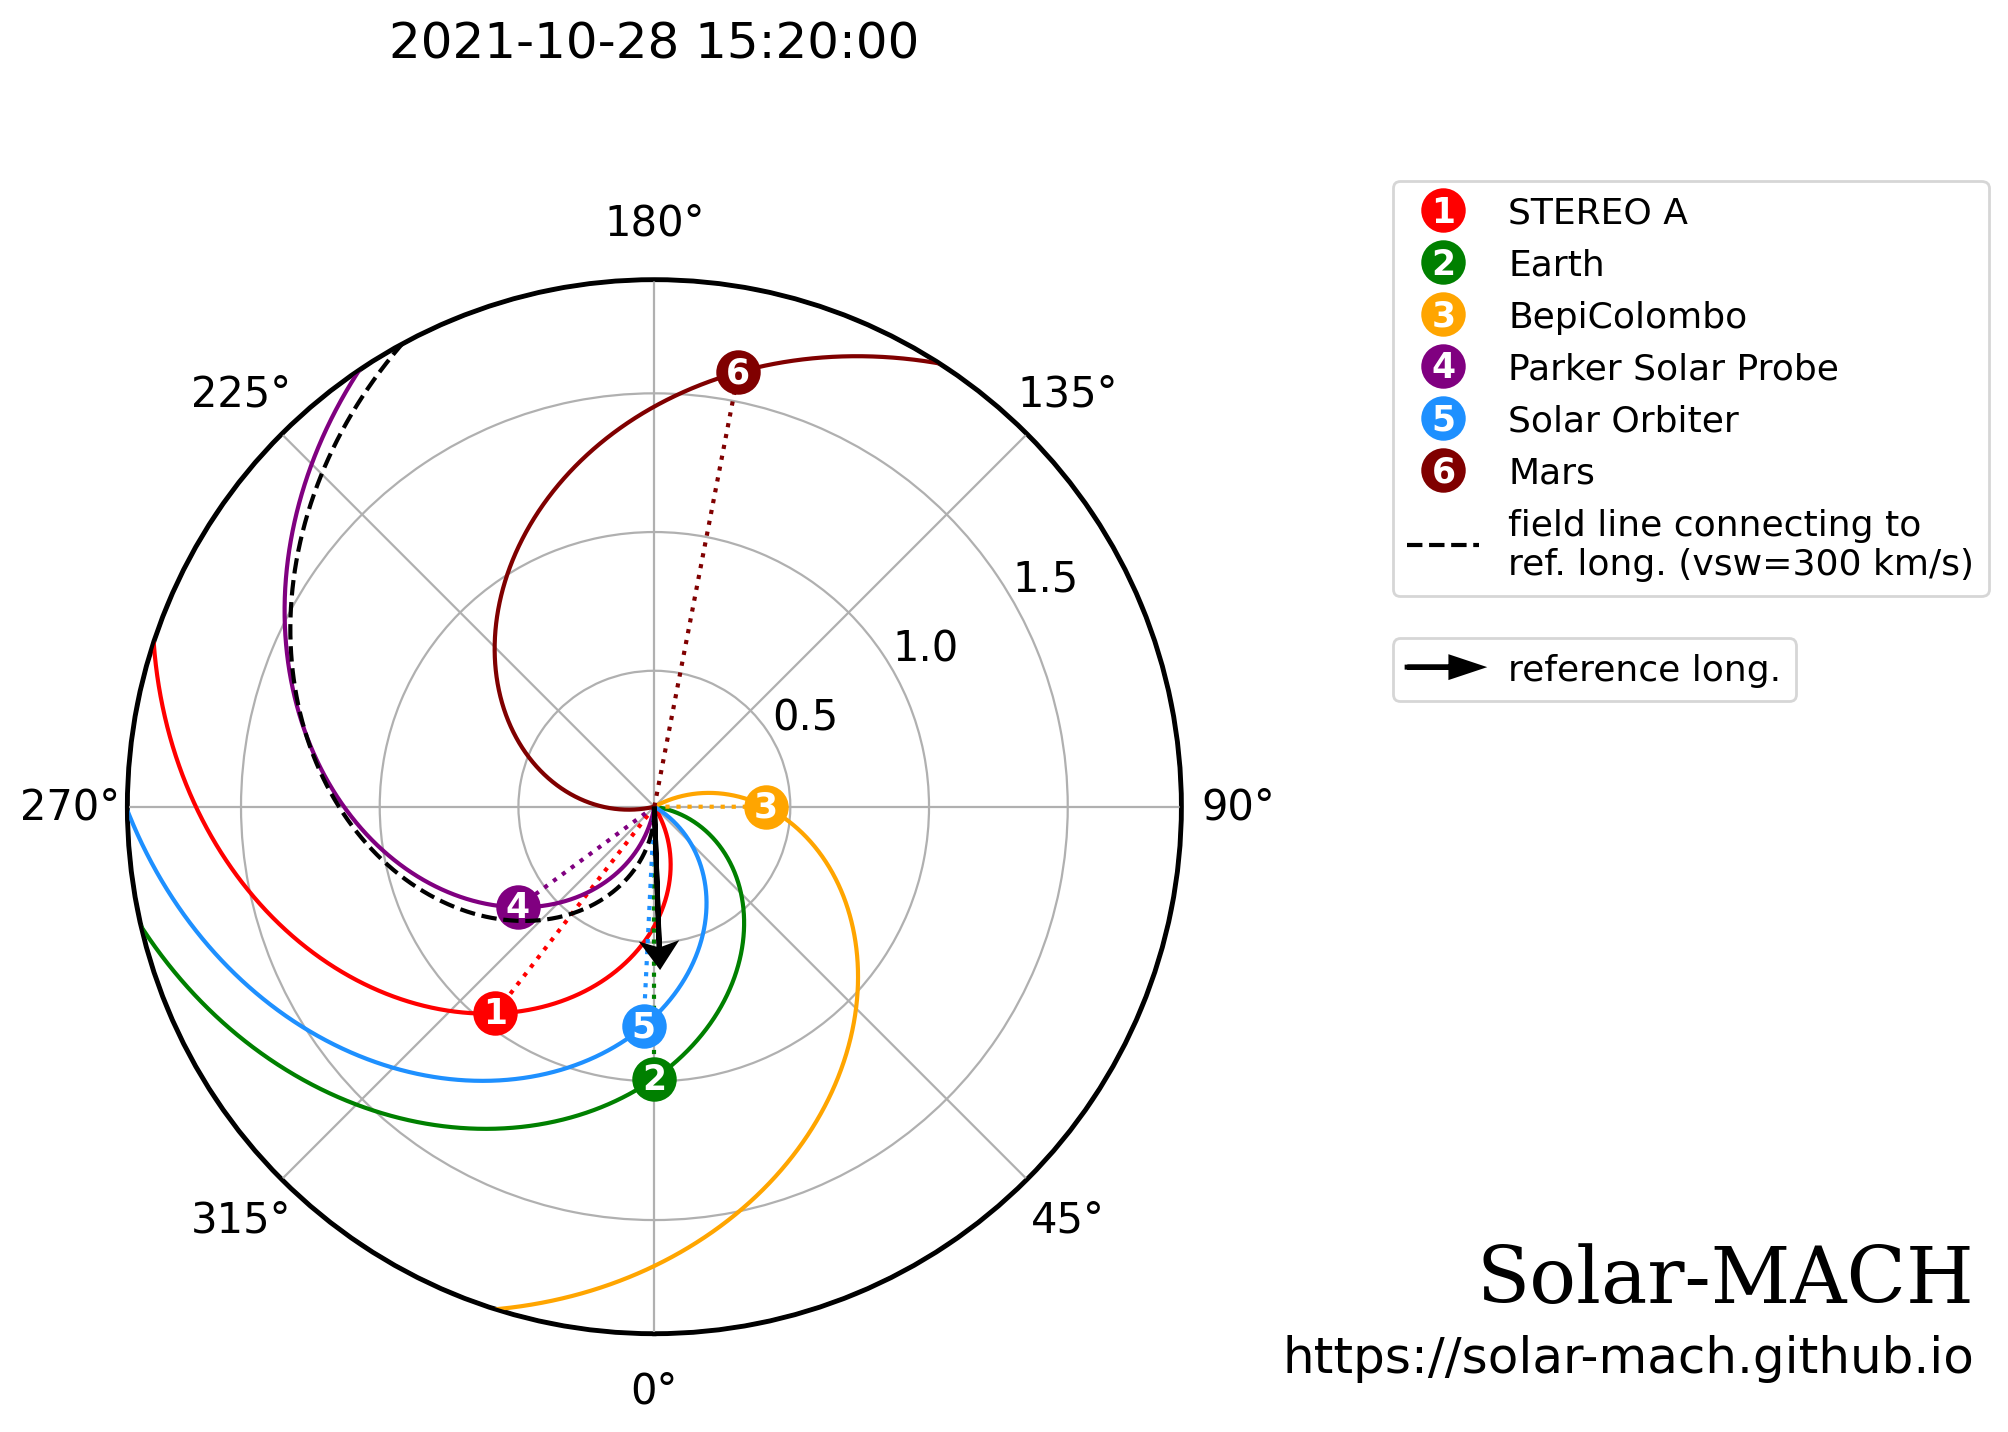

In [15]:
sm3 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys)
sm3.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         reference_vsw=reference_vsw,
         transparent=transparent,
         numbered_markers=numbered_markers,
         outfile=filename
         )

---
## 4. Only obtain data as Pandas DataFrame <a class="anchor" id="only_dataframe"></a>

We can also just obtain a table with the spatial data, without producing a plot at all.

First provide necessary options:

In [16]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [400, 400, 400, 400, 400, 400]        # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Then initialize `SolarMACH` and obtain data as Pandas DataFrame:

In [17]:
sm4 = SolarMACH(date, body_list, vsw_list)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,275.723483,-3.999131,0.961351,-28.467807,-3.361541,400,335.567204
1,Earth,304.191289,-0.637590,1.014043,0.000000,0.000000,400,7.540620
2,BepiColombo,330.303801,-1.980711,0.570648,26.112511,-1.343121,400,5.799167
3,PSP,162.146839,-2.129984,0.068020,-142.044450,-1.492394,400,166.120423
4,Solar Orbiter,108.356580,2.066323,0.933521,-195.834709,2.703913,400,166.604495
5,Mars,16.893904,4.867268,1.384205,-287.297385,5.504858,400,103.046865


If we also provide the `reference` information, it will be available in the table, too:

In [18]:
sm4 = SolarMACH(date, body_list, vsw_list, reference_long=273, reference_lat=7)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,STEREO-A,275.723483,-3.999131,0.961351,-28.467807,-3.361541,400,335.567204,2.723483,62.567204,-10.999131
1,Earth,304.191289,-0.637590,1.014043,0.000000,0.000000,400,7.540620,31.191289,94.540620,-7.637590
2,BepiColombo,330.303801,-1.980711,0.570648,26.112511,-1.343121,400,5.799167,57.303801,92.799167,-8.980711
3,PSP,162.146839,-2.129984,0.068020,-142.044450,-1.492394,400,166.120423,-110.853161,-106.879577,-9.129984
4,Solar Orbiter,108.356580,2.066323,0.933521,-195.834709,2.703913,400,166.604495,-164.643420,-106.395505,-4.933677
5,Mars,16.893904,4.867268,1.384205,-287.297385,5.504858,400,103.046865,-256.106096,-169.953135,-2.132732


Note again that by default all coordinates are given in Carrington coordinates (as indicated in the column titles). To have this data in Stoneyhurst coordinates, define the `coord_sys` when initilizing `SolarMACH`:

In [19]:
sm4a = SolarMACH(date, body_list, vsw_list, coord_sys='Stoneyhurst')
df = sm4a.coord_table
display(df)

,Spacecraft/Body,Stonyhurst longitude (°),Stonyhurst latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Stonyhurst)
0,STEREO-A,-28.467809,-3.999131,0.961351,-28.467807,-3.361541,400,31.375912
1,Earth,-0.000002,-0.637590,1.014043,0.000000,0.000000,400,63.349329
2,BepiColombo,26.112509,-1.980711,0.570648,26.112511,-1.343121,400,61.607876
3,PSP,-142.044452,-2.129984,0.068020,-142.044450,-1.492394,400,-138.070868
4,Solar Orbiter,164.165289,2.066323,0.933521,164.165291,2.703913,400,222.413203
5,Mars,72.702613,4.867268,1.384205,72.702615,5.504858,400,158.855574


---
## 5. Advanced plotting options <a class="anchor" id="plotting_options"></a>

Since version 0.1.6, `solarmach` provides the option to color a cone-shaped area or an area between two Parker spirals in the heliographic plane. For this, `SolarMACH.plot()` has three new options:

- **long_sector**: list of 2 numbers: start and stop longitude of a shaded area; e.g. `[350, 20]` to get a cone from 350 to 20 degree longitude (for long_sector_vsw=None`).
- **long_sector_vsw**: list of 2 numbers: Solar wind speed used to calculate Parker spirals (at start and stop longitude provided by `long_sector`) between which a reference cone should be drawn; e.g. `[400, 400]` to assume for both edges of the fill area a Parker spiral produced by solar wind speeds of 400 km/s. If `None`, instead of Parker spirals, straight lines are used, i.e. a simple cone will be plotted. By default, `None`.
- **long_sector_color**: String defining the matplotlib color used for the shading defined by `long_sector`. By default, `'red'`.

In addition, it is now possible to plot a set of evenly distributed Parker spirals in the background, see [5.3 Example 3: plot background Parker spirals](#5.3-Example-3:-plot-background-Parker-spirals).

### 5.1 Example 1: plot cone-shaped area

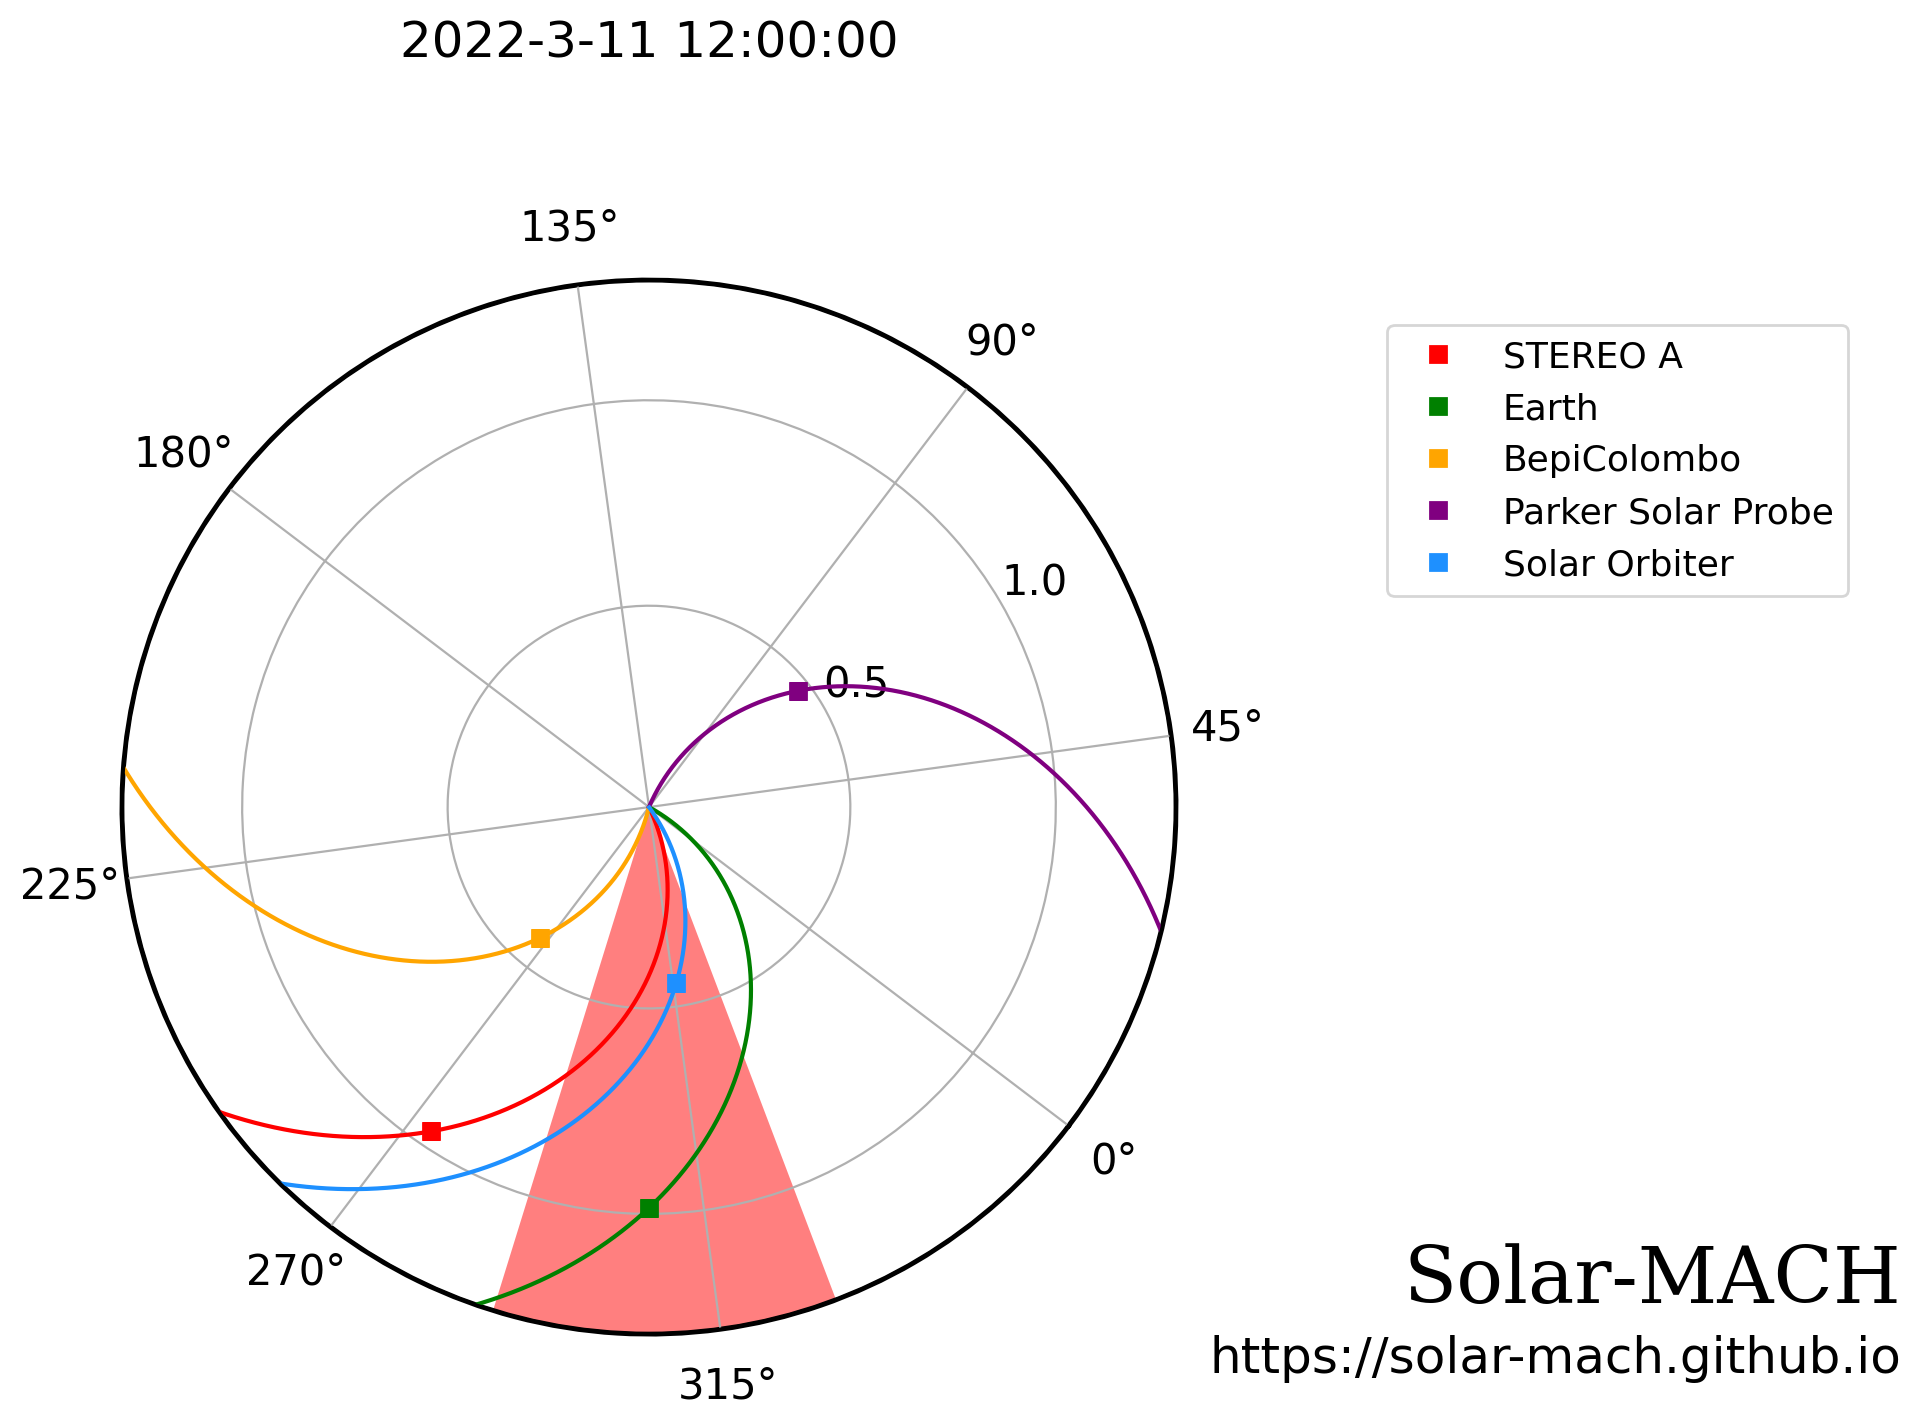

In [20]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm5a = SolarMACH(date, body_list, vsw_list)
sm5a.plot(long_sector=[290, 328], long_sector_vsw=None, long_sector_color='red')

### 5.2 Example 2: shade area between two Parker spirals

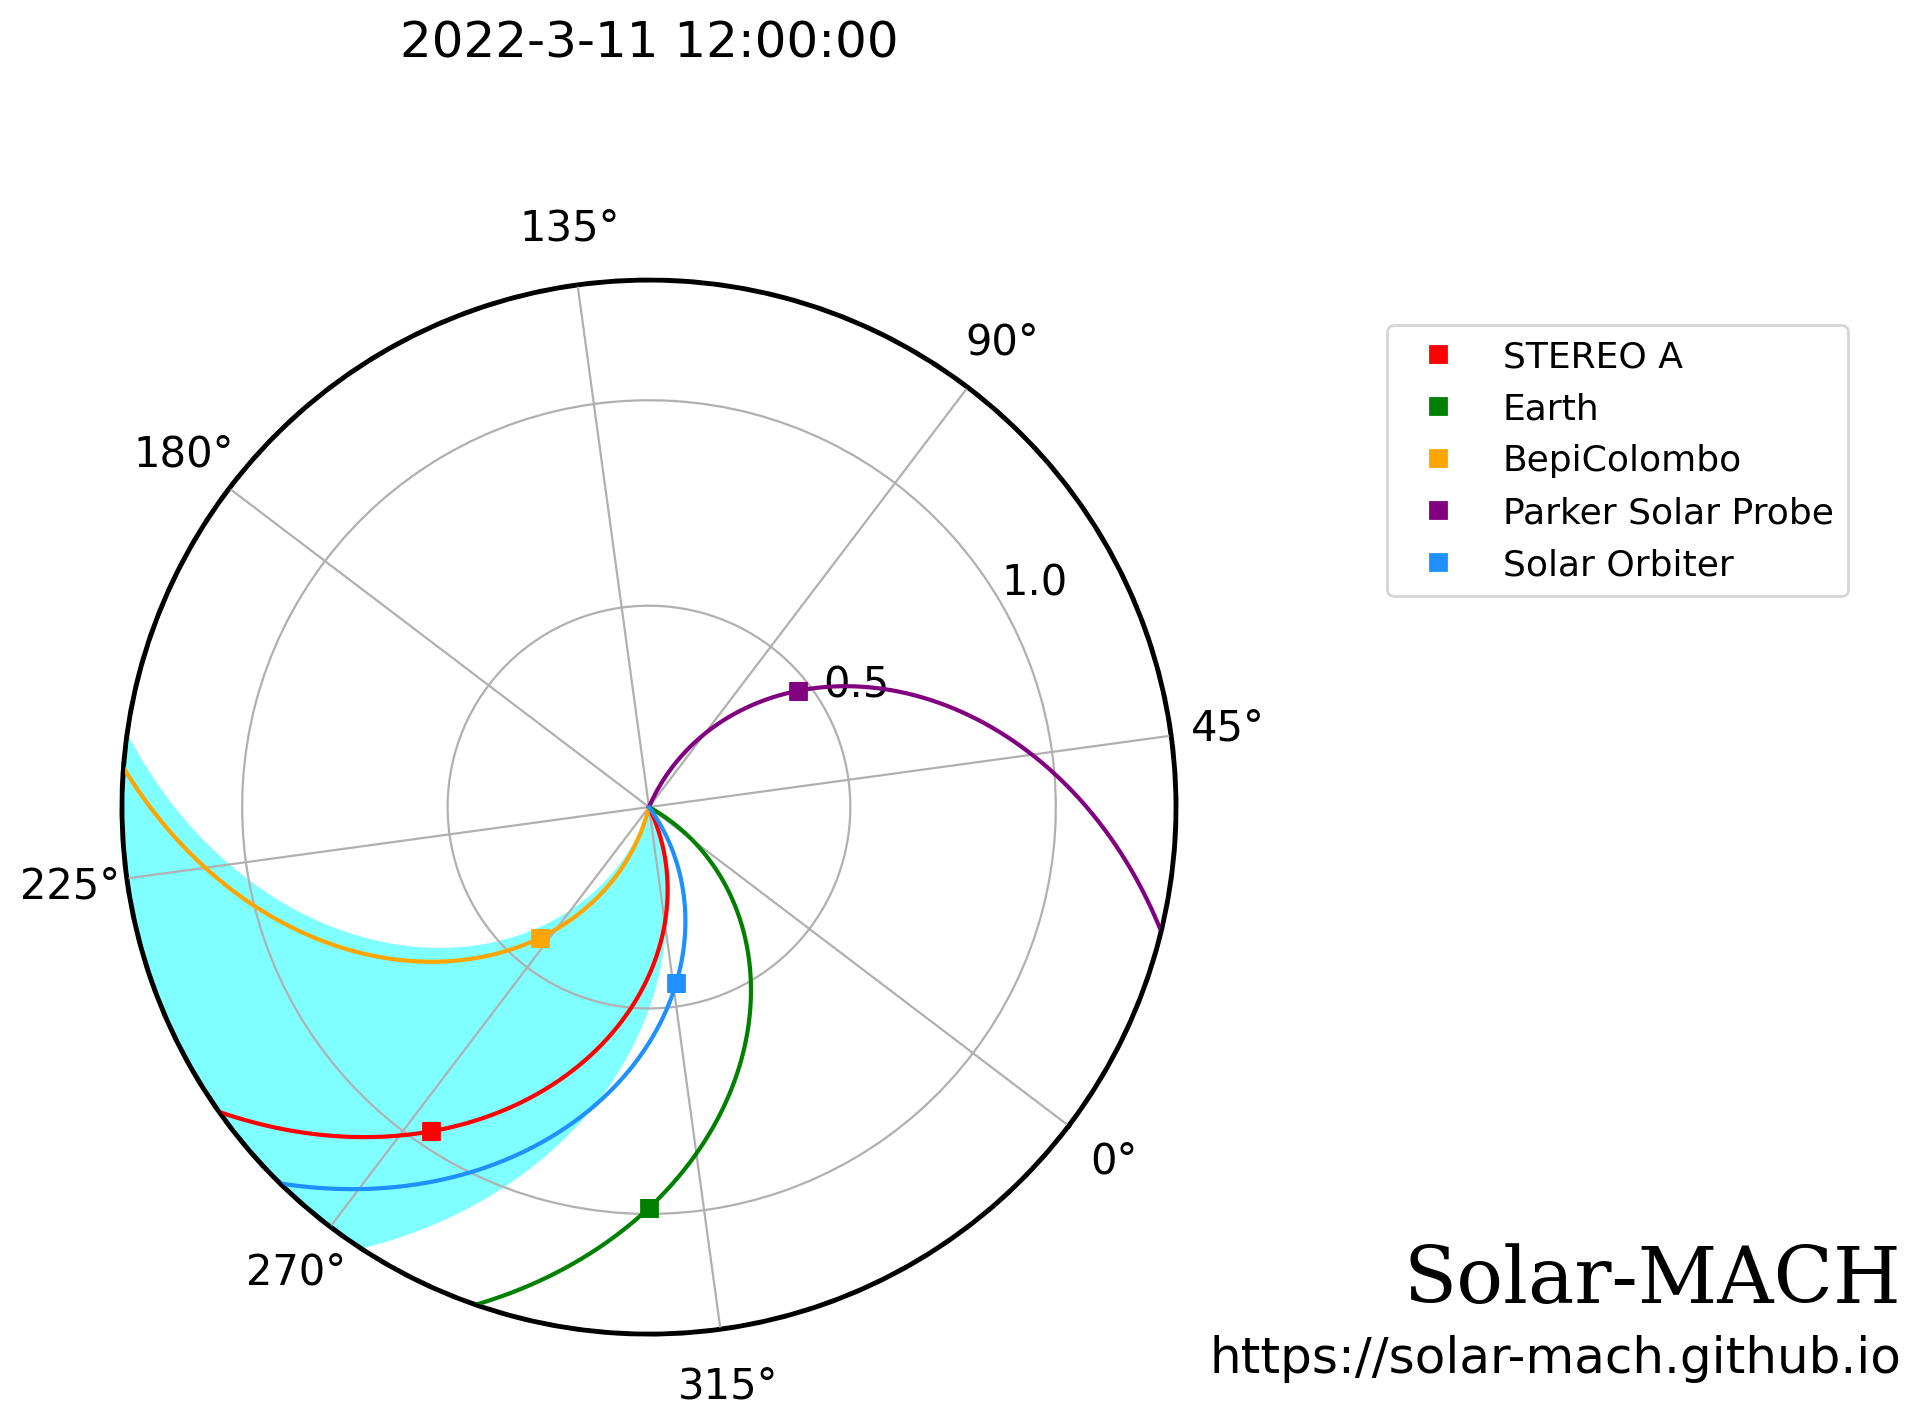

In [21]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm5b = SolarMACH(date, body_list, vsw_list)
sm5b.plot(long_sector=[290, 328], long_sector_vsw=[400,600], long_sector_color='cyan')

Note that there still is a bug if the speeds in `long_sector_vsw` differ to some extent; then the plotting might not work as intended.

### 5.3 Example 3: plot background Parker spirals

Since version 0.1.6, `solarmach` provides the option to plot a set of evenly distributed Parker spirals in the background, using the option `background_spirals` in `SolarMACH.plot()`:

**background_spirals**: list of 2 numbers (and 3 optional strings). If defined, plot evenly distributed Parker spirals over 360°. `background_spirals[0]` defines the number of spirals, `background_spirals[1]` the solar wind speed in km/s used for their calculation. 

Optionally, `background_spirals[2]`, `background_spirals[3]`, and `background_spirals[4]` change the plotting line style, color, and alpha setting, respectively (default values `':'`, `'grey'`, and `0.1`). 

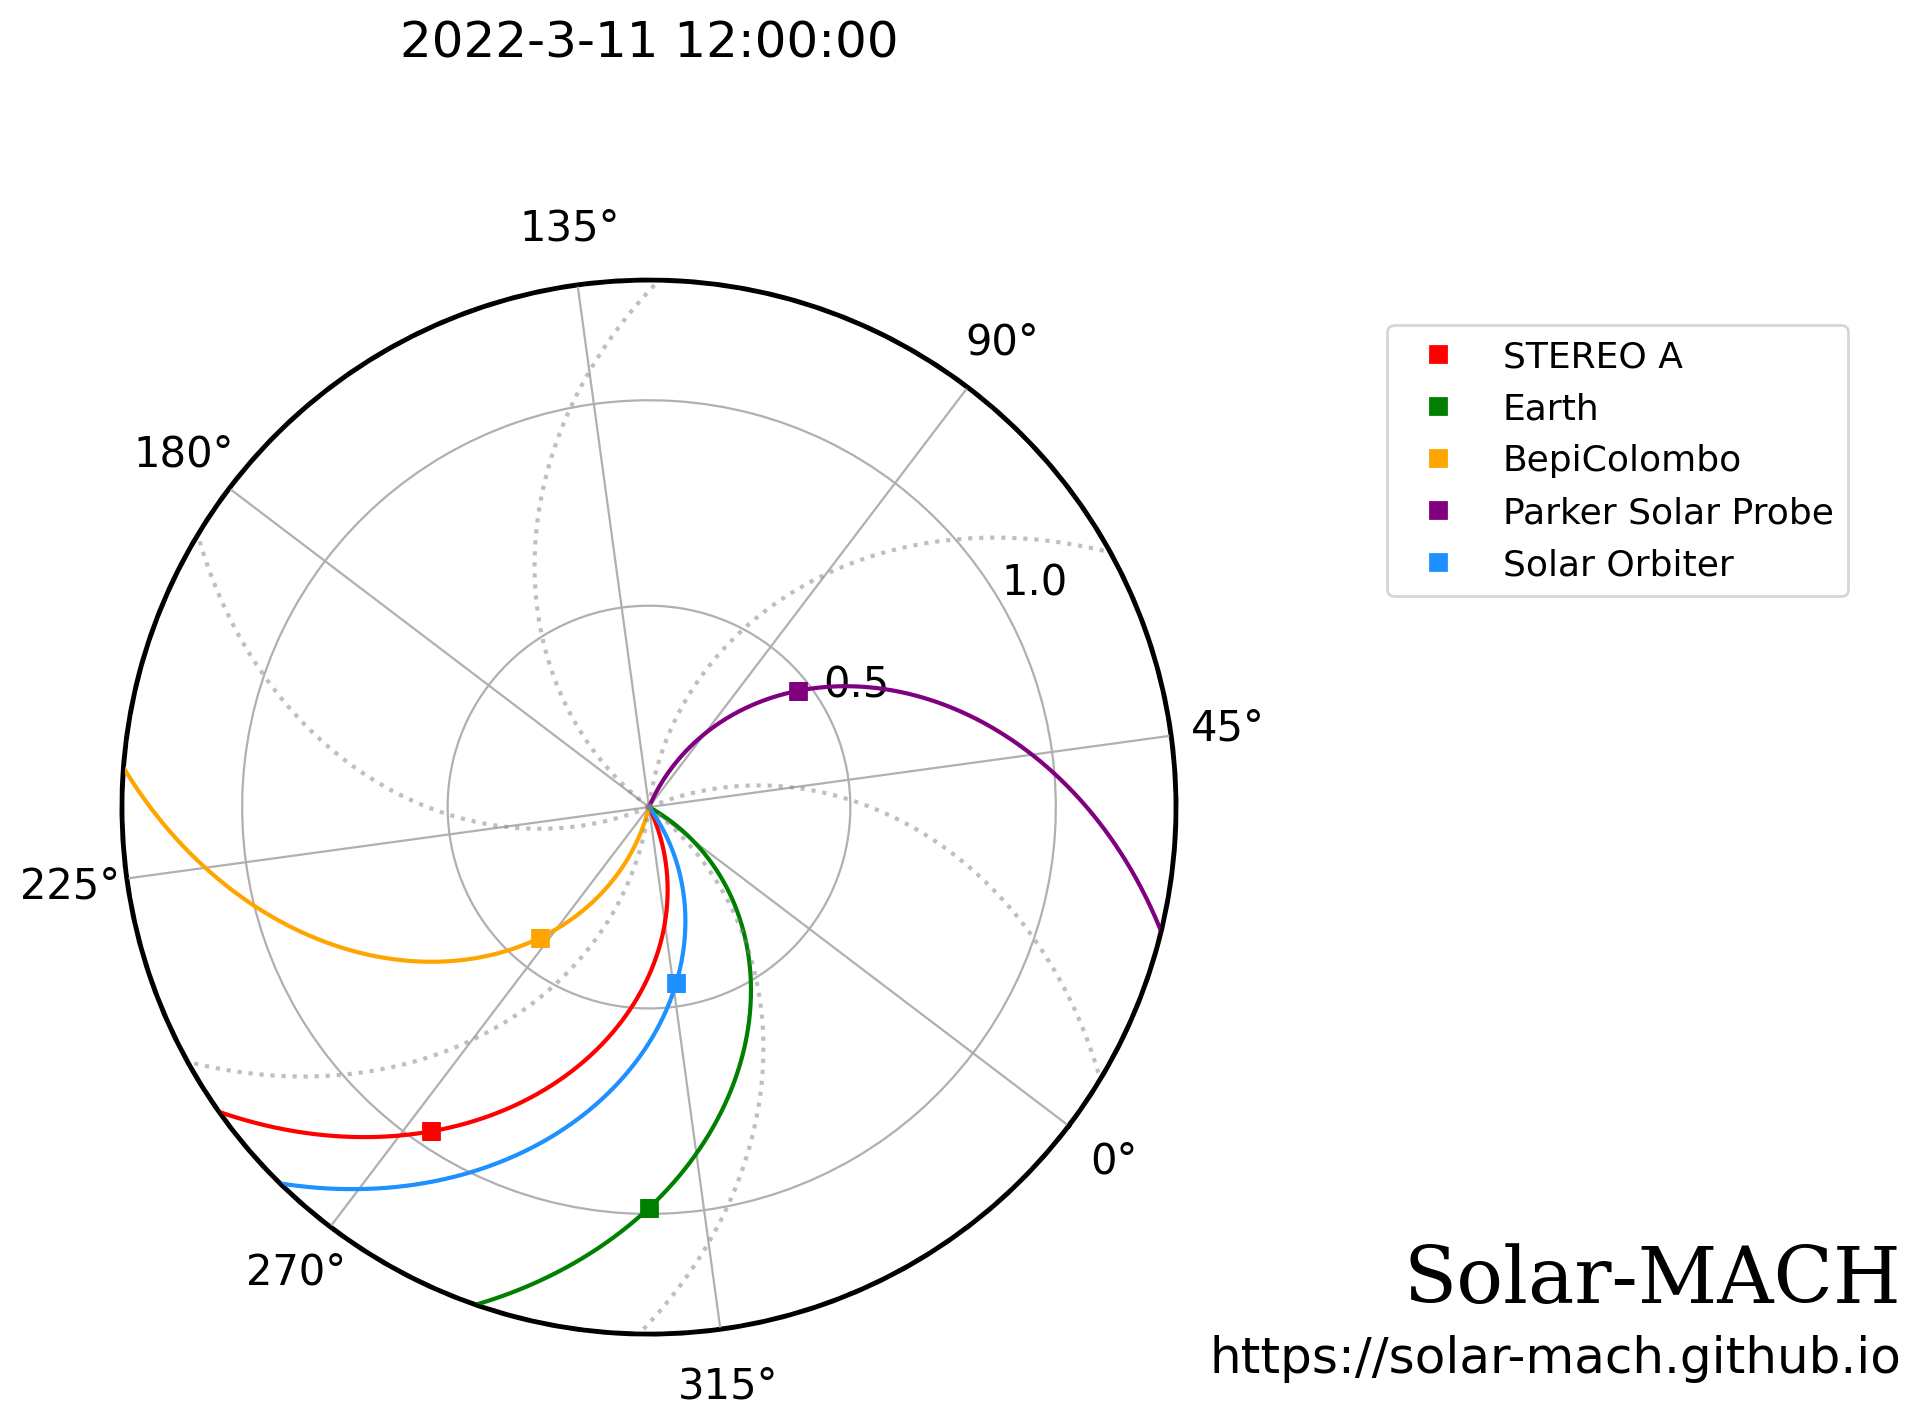

In [22]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm = SolarMACH(date, body_list, vsw_list)
sm.plot(background_spirals=[6, 600])

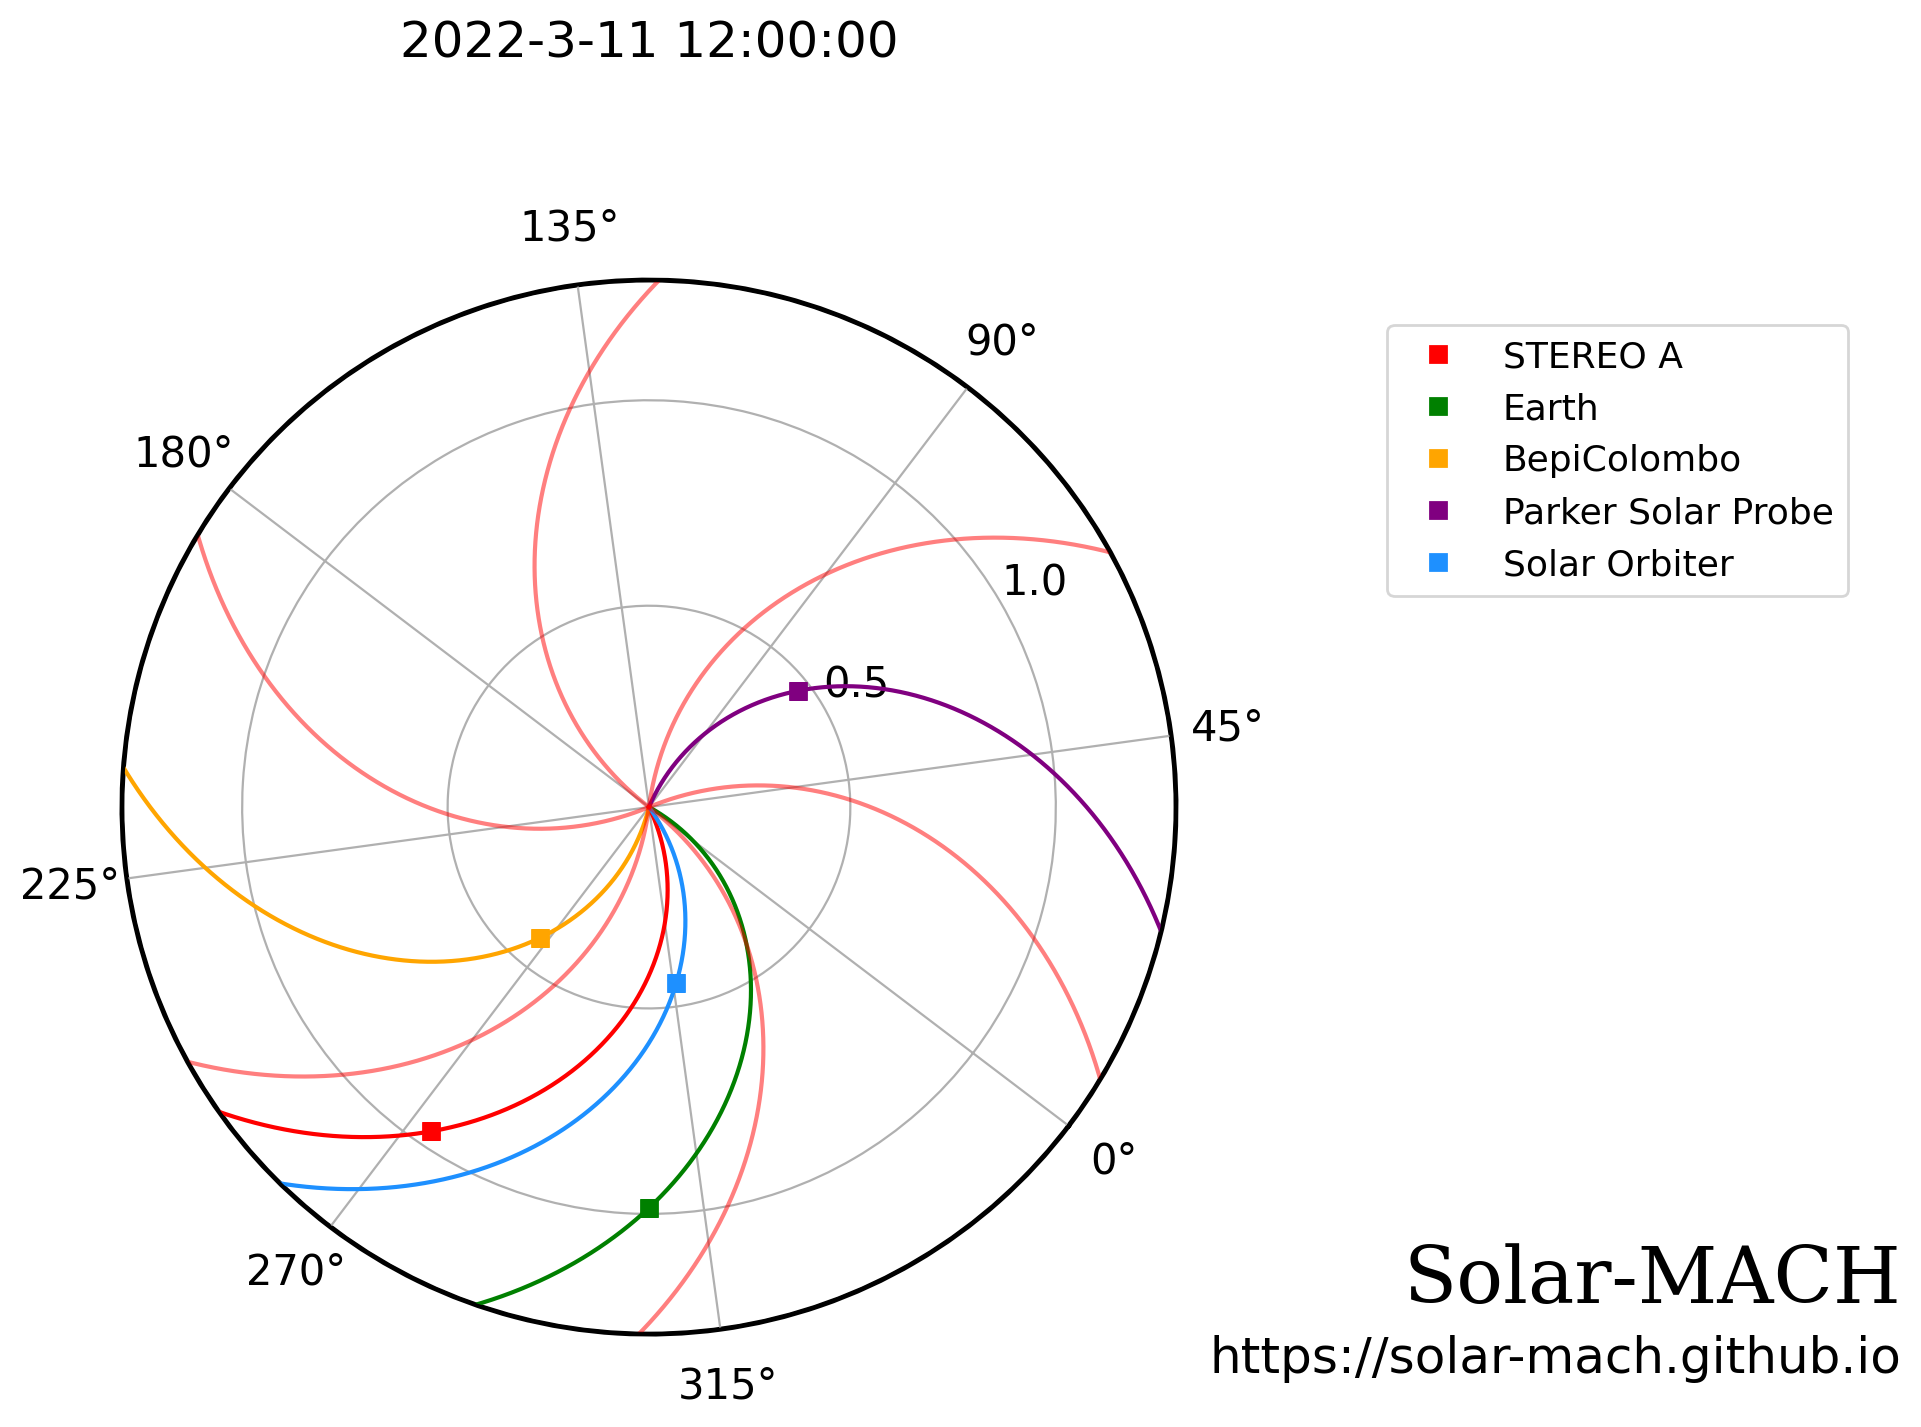

In [23]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm = SolarMACH(date, body_list, vsw_list)
sm.plot(background_spirals=[6, 600, '-', 'red', 0.5])

---
## 6. Advanced: edit the figure <a class="anchor" id="edit_figure"></a>
Let's produce again the figure for the Oct 2021 GLE event.

In [25]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]  # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'
sm6 = SolarMACH(date, body_list, vsw_list)

But now we prodive the option `return_plot_object=True` to the `plot()` call, so that the matplotlib figure and axis object will be returned:

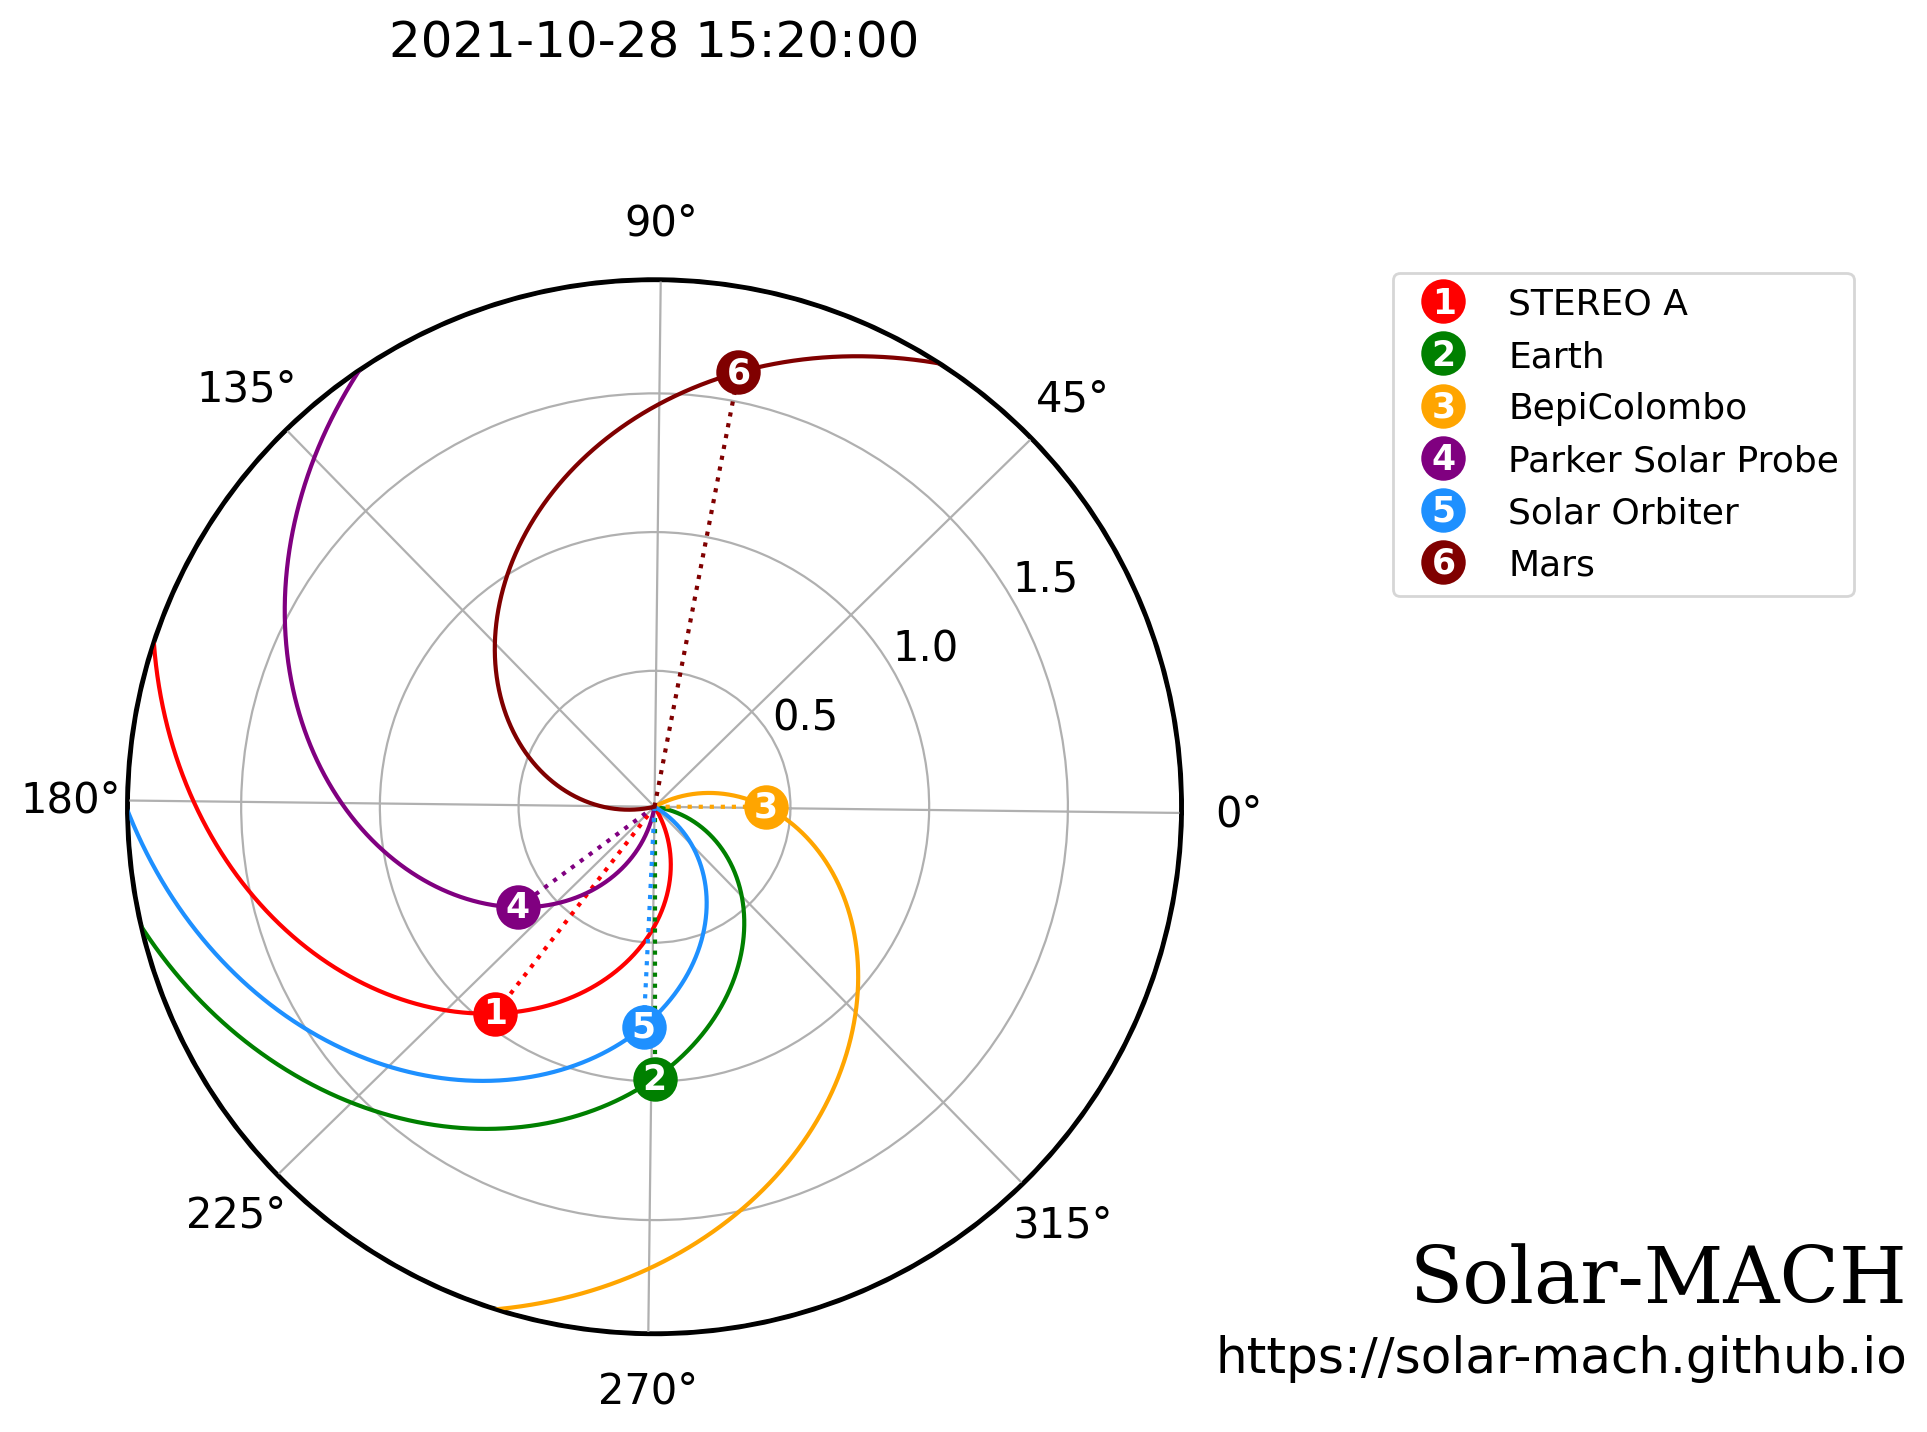

In [26]:
fig, ax = sm6.plot(plot_spirals=True,
                   plot_sun_body_line=True,
                   transparent=False,
                   numbered_markers=True,
                   return_plot_object=True
                  )

Now we can make some post-adjustments to the figure (requires of course some Python knowledge):

In [27]:
ax.set_title("What's that?! A new title!", pad=60)

Text(0.5, 1.0, "What's that?! A new title!")

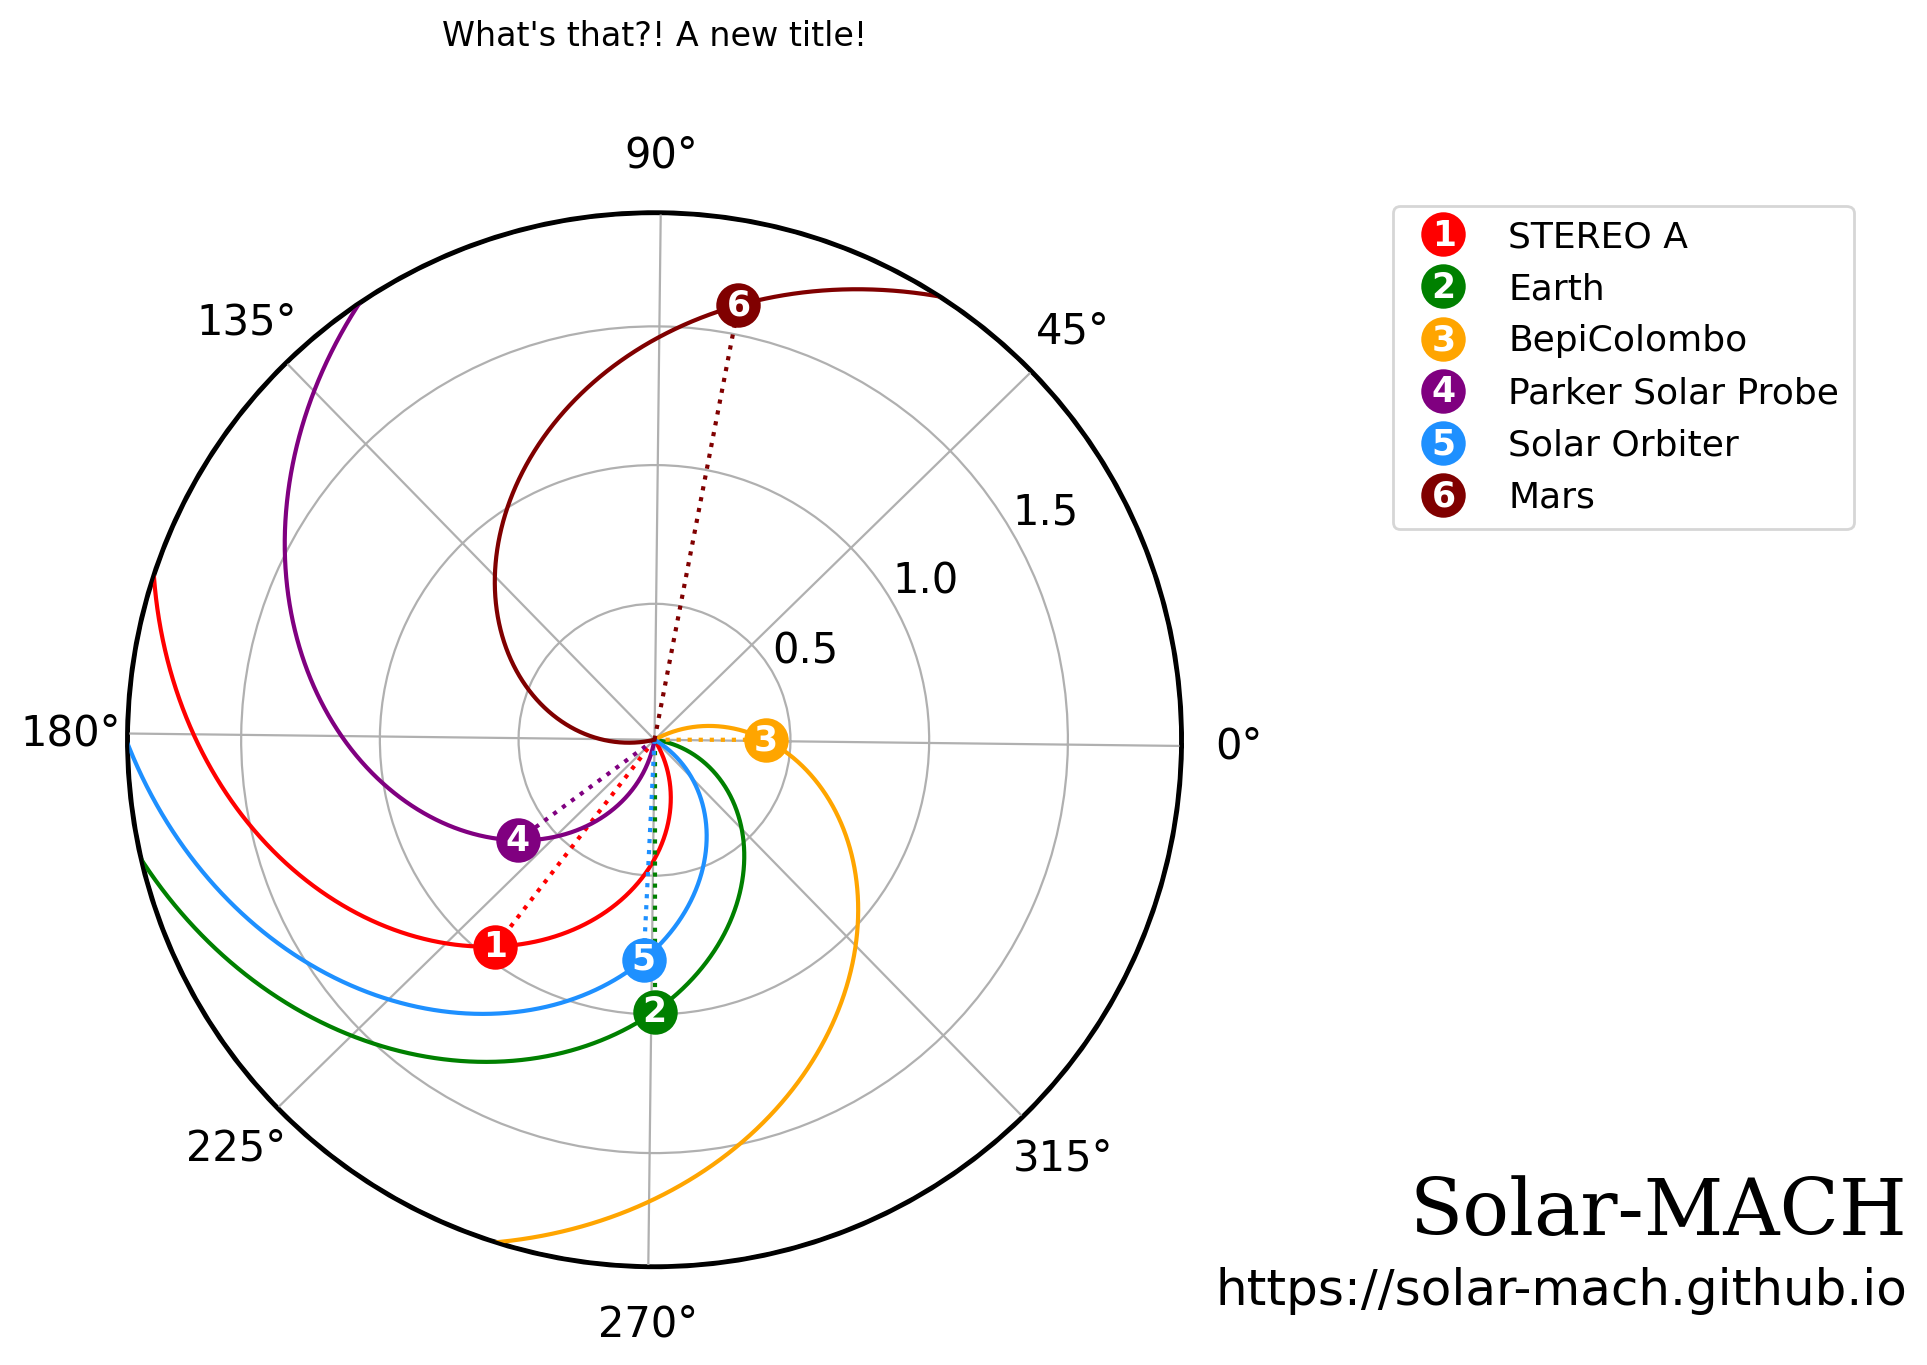

In [28]:
fig

---
## 7. Ideas for further usage <a class="anchor" id="ideas_further_usage"></a>

### 7.1 Loop over multiple datetimes (plots) <a class="anchor" id="loop_datetimes_plots"></a>

This might be useful to either:

- read-in an *event catalog*, and loop over those datetimes to quickly get the constellations of all these events,
- create a series of daily constellation plots, and combine them into one animation:

In [ ]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]                # position-sensitive solar wind speed per body in body_list
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = False                       # plot straight line between Sun and body
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker

for i in range(2,19,1):    
    j = str(i).rjust(2, '0')
    date = f'2022-6-{j} 12:00:00'
    filename = f'animate_{date[:-9]}.png'        # define filename of output figure

    sm7 = SolarMACH(date, body_list, vsw_list, coord_sys='Stoneyhurst')
    sm7.plot(plot_spirals=plot_spirals,
             plot_sun_body_line=plot_sun_body_line,
             transparent=transparent,
             numbered_markers=numbered_markers,
             outfile=filename
             )

Get a sorted list of the files just created using `glob`:

In [29]:
import glob
files = sorted(glob.glob(filename.replace(f'{i}', '*')))

Build an animated GIF out of these files using `imageio`:

In [32]:
import imageio
with imageio.get_writer('solarmach.gif', mode='I') as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_146169/2634268033.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


When completed, this will have created an animated GIF file `solarmach.gif` in the same directory as this notebook (as well as a series of files `animate_DATE.png` that can be deleted).

### 7.2 Loop over multiple datetimes (only data) <a class="anchor" id="loop_datetimes_data"></a>

For example, to look for spacecraft alignments, like *"When are PSP and Solar Orbiter at the same magnetic footpoint?"*

In [33]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]  # position-sensitive solar wind speed per body in body_list

df = []
dates = []
for i in range(1,31,1):
    date = f'2022-6-{i} 12:00:00'

    sm8 = SolarMACH(date, body_list, vsw_list)
    df = df + [sm8.coord_table]
    dates = dates + [date]

In [34]:
display(df[0])
display(df[1])
display(df[2])

,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,233.080604,7.169518,0.958294,-37.595981,2.455532,340,302.733100
1,Earth,270.676585,4.713986,0.993489,0.000000,0.000000,300,353.039432
2,BepiColombo,0.634907,0.905419,0.411322,-270.041678,-3.808567,350,29.801105
3,PSP,217.026554,3.853925,0.623148,-53.650031,-0.860061,350,261.252554
4,Solar Orbiter,267.858104,2.189101,0.803886,-2.818480,-2.524885,320,330.499586
5,Mars,79.738619,-4.884758,1.610970,-190.937966,-9.598744,350,194.379501


,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,233.080604,7.169518,0.958294,-37.595981,2.455532,340,302.733100
1,Earth,270.676585,4.713986,0.993489,0.000000,0.000000,300,353.039432
2,BepiColombo,0.634907,0.905419,0.411322,-270.041678,-3.808567,350,29.801105
3,PSP,217.026554,3.853925,0.623148,-53.650031,-0.860061,350,261.252554
4,Solar Orbiter,267.858104,2.189101,0.803886,-2.818480,-2.524885,320,330.499586
5,Mars,79.738619,-4.884758,1.610970,-190.937966,-9.598744,350,194.379501


,Spacecraft/Body,Carrington longitude (°),Carrington latitude (°),Heliocentric distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,233.080604,7.169518,0.958294,-37.595981,2.455532,340,302.733100
1,Earth,270.676585,4.713986,0.993489,0.000000,0.000000,300,353.039432
2,BepiColombo,0.634907,0.905419,0.411322,-270.041678,-3.808567,350,29.801105
3,PSP,217.026554,3.853925,0.623148,-53.650031,-0.860061,350,261.252554
4,Solar Orbiter,267.858104,2.189101,0.803886,-2.818480,-2.524885,320,330.499586
5,Mars,79.738619,-4.884758,1.610970,-190.937966,-9.598744,350,194.379501


In [35]:
display(dates)

['2022-6-1 12:00:00',
 '2022-6-2 12:00:00',
 '2022-6-3 12:00:00',
 '2022-6-4 12:00:00',
 '2022-6-5 12:00:00',
 '2022-6-6 12:00:00',
 '2022-6-7 12:00:00',
 '2022-6-8 12:00:00',
 '2022-6-9 12:00:00',
 '2022-6-10 12:00:00',
 '2022-6-11 12:00:00',
 '2022-6-12 12:00:00',
 '2022-6-13 12:00:00',
 '2022-6-14 12:00:00',
 '2022-6-15 12:00:00',
 '2022-6-16 12:00:00',
 '2022-6-17 12:00:00',
 '2022-6-18 12:00:00',
 '2022-6-19 12:00:00',
 '2022-6-20 12:00:00',
 '2022-6-21 12:00:00',
 '2022-6-22 12:00:00',
 '2022-6-23 12:00:00',
 '2022-6-24 12:00:00',
 '2022-6-25 12:00:00',
 '2022-6-26 12:00:00',
 '2022-6-27 12:00:00',
 '2022-6-28 12:00:00',
 '2022-6-29 12:00:00',
 '2022-6-30 12:00:00']